In [1]:
%matplotlib inline
import os
# pandas is used to manage data
import pandas as pd
# matplotlib is used to make plots
import  matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
mydir = os.path.expanduser("~/GitHub/Task2_Traits/")

You just got some nice growth curve data where we fit the Gompertz equation to each sample. From the Gompertz equation we get four parameters that describe the shape of the growth curve. 

$\lambda=$ the lag parameter

$A=$ Yield

$u_{max}=$ the maximum rate of growth

$b_{0}=$ the intercept of the line

Three of the four parameters are shown in the figure below 

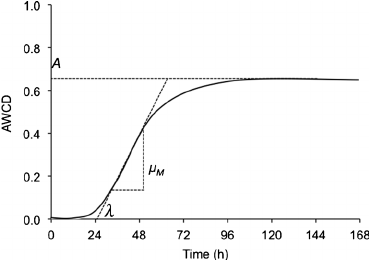

In [3]:
Image(filename = mydir + 'figures/gomp_example.png') 

In [4]:
# import the dataset
IN = pd.read_csv(mydir + 'data/mergedParams.txt', sep = '\t')

Lets look at the first five rows.

In [5]:
IN.head(n=5)

,Sample,Rep,b0,A,umax,L,z,umax_lw,umax_up,umax_lw_FI,umax_up_FI,TransferTime,Strain,Replicate,Day
0,L0B1-100,1,0.086851,0.566021,0.143656,6.035135,-2.062102,0.089979,0.197333,0.089978,0.197334,1,B,1,100
1,L0D1-100,1,0.050485,0.803536,0.109295,20.000000,-3.415981,0.102342,0.116248,0.102342,0.116248,1,D,1,100
2,L0F1-100,1,0.078446,1.084428,0.126298,9.340900,-2.609654,0.115189,0.137406,0.115189,0.137406,1,F,1,100
3,L0B1-100,2,0.083210,0.747983,0.122232,5.916187,-2.950842,0.108705,0.135758,0.108705,0.135759,1,B,1,100
4,L0D1-100,2,0.050238,0.881675,0.098122,20.000000,-3.953679,0.094809,0.101436,0.094809,0.101436,1,D,1,100


Let's take a look at how $u_{max}$ changes for *Bacillus* at day 100. To do this we'll first subset the data, extracting only the rows where `Strain = B`

In [7]:
B = IN.loc[IN['Strain'] == 'B']
B.head(n=5)

,Sample,Rep,b0,A,umax,L,z,umax_lw,umax_up,umax_lw_FI,umax_up_FI,TransferTime,Strain,Replicate,Day
0,L0B1-100,1,0.086851,0.566021,0.143656,6.035135,-2.062102,0.089979,0.197333,0.089978,0.197334,1,B,1,100
3,L0B1-100,2,0.083210,0.747983,0.122232,5.916187,-2.950842,0.108705,0.135758,0.108705,0.135759,1,B,1,100
6,L0B1-100,3,0.087330,0.692355,0.124918,6.192774,-2.664453,0.104602,0.145234,0.104601,0.145234,1,B,1,100
8,L0B2-100,1,0.085483,0.991886,0.134640,5.702287,-2.008899,0.110695,0.158584,0.110695,0.158585,1,B,2,100
11,L0B2-100,2,0.083354,1.046616,0.126757,5.694813,-2.381478,0.112279,0.141235,0.112278,0.141235,1,B,2,100


Now we take the average $u_{max}$ for our technical replicates.

In [8]:
def getTransferTime(x):
    if x[1] == str(0):
        return 1
    elif x[1] == str(1):
        return 10
    elif x[1] == str(2):
        return 100

In [20]:
mean = B[["A", "umax", "L"]].groupby(B['Sample']).mean().reset_index()
mean['TransferTime'] = mean['Sample'].apply(getTransferTime)
mean['Strain'] = mean['Sample'].apply(lambda x: x[2])
mean['Replicate'] = mean['Sample'].apply(lambda x: x[3])
mean['Day'] = mean['Sample'].apply(lambda x: x[-3:])
# only take samples from day 100
mean_100 = mean.loc[mean['Day'] == '100']

When it's time to do a more formal, regression-based analysis we won't do this, but for now to get an idea of the difference in $u_{max}$ we'll just take the mean and plot the difference among replicate populations.

In [35]:
def make_fig(mean_100, param):  
    mean_100_1day = mean_100.loc[mean_100['TransferTime'] == 1]
    mean_100_10day = mean_100.loc[mean_100['TransferTime'] == 10]

    data_to_plot = [mean_100_1day[param], mean_100_10day[param]]

    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot)
    ## add patch_artist=True option to ax.boxplot() 
    ## to get fill color
    bp = ax.boxplot(data_to_plot, patch_artist=True)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)

    ## Custom x-axis labels
    ax.set_xticklabels(['1-Day', '10-Day'])
    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    if param == 'umax':
        ax.set_ylabel(r'$u_{max}$', fontsize = 25)
    elif param == 'A':
        ax.set_ylabel(r'$A$', fontsize = 25)
    elif param == 'L':
        ax.set_ylabel(r'$\lambda$', fontsize = 25)
    else:
        ax.set_ylabel('', fontsize = 25)

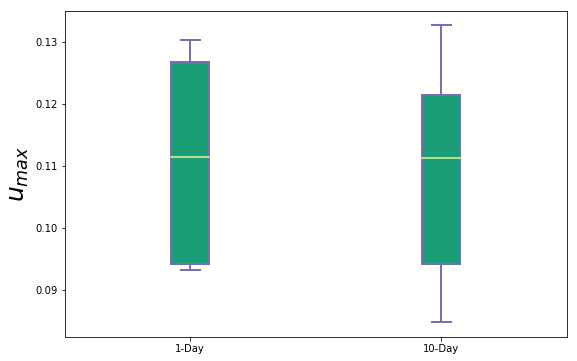

In [36]:
make_fig(mean_100, param = 'umax')

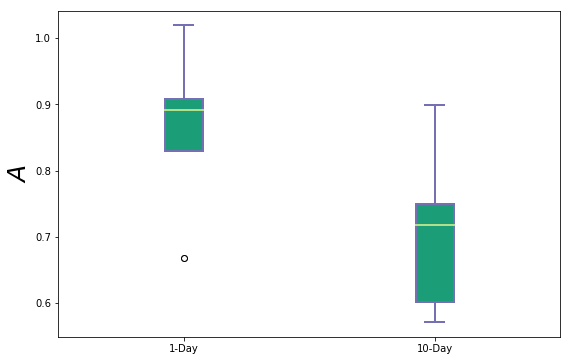

In [37]:
make_fig(mean_100, param = 'A')

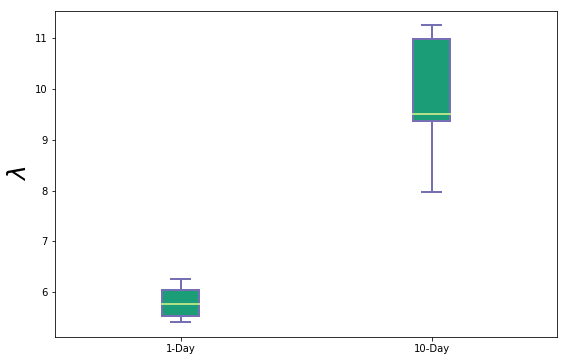

In [38]:
make_fig(mean_100, param = 'L')

So $u_{max}$ isn't really that different, but 1-day lines have a higher yield and a lower lag-time.